In [1]:
%matplotlib notebook
import math
from matplotlib.ticker import MaxNLocator
import subprocess
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
problem = "../problems/grid/10X11.pddl"
domain = "../problems/grid/domain.pddl"
goal_set = "../problems/grid/10X11.goalset"
#max_nodes = "10"
#df = "0.5"
#max_s_nodes = "10"
precision = "2"

In [3]:
cmd = [".././PFT.x"]
flags = [ domain, problem, goal_set,
#    "-m", max_nodes,
#    "-D", df,
#    "-s", max_s_nodes,
#    "-P", precision,
    "-c"]

In [4]:
pipe = subprocess.Popen(
    cmd + flags,
    stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
answer, stderr = pipe.communicate()
print(answer)


b' --- OK.\n\n(MOVE P6_1 P5_1),(MOVE P5_1 P4_1),(MOVE P4_1 P3_1),(MOVE P3_1 P2_1),(MOVE P2_1 P2_2),(MOVE P2_2 P2_3),(MOVE P2_3 P2_4),(MOVE P2_4 P2_5),(MOVE P2_5 P2_6),(MOVE P2_6 P2_7),(MOVE P2_7 P2_8),(MOVE P2_8 P2_9),(MOVE P2_9 P2_10),\n4.87758,4.82604,4.88723,4.78396,4.4153,4.02789,3.41381,3.27918,2.80444,1.71282,0.878047,0.441816,0.15458,\n0.395428,0.0822002,0.0119947,0.00164067,0.00164067,0.00164067,0.00164067,0.00164067,0.00164067,0.00101803,0.000956667,0.000949053,0.000948037,\n0.677134,0.932884,0.990206,0.99866,0.99866,0.99866,0.99866,0.99866,0.99866,0.999239,0.999317,0.999328,0.99933,\n0.161433,0.0335581,0.00489681,0.000669802,0.000669802,0.000669802,0.000669802,0.000669802,0.000669802,9.07266e-05,1.228e-05,1.66194e-06,2.24919e-07,\n0.161433,0.0335581,0.00489681,0.000669802,0.000669802,0.000669802,0.000669802,0.000669802,0.000669802,0.00067019,0.000670242,0.00067025,0.000670251,\n0\n110\n'


In [5]:
lines = str(answer).split("\\n")[2:-1]
#print(lines)
actions = lines[0].split(",")[:-1]
times = list(map(float,lines[1].split(",")[:-1]))
distances = list(map(float,lines[2].split(",")[:-1]))

prob_dists = []
for line in lines[3:]:
    prob_dists += [list(map(float,line.split(",")[:-1]))]
    
prob_dists = prob_dists[:-1]
prob_dists = list(filter(lambda x: x != [], prob_dists))

print("Actions: ")
print(actions)
print()
print("Times: ")
print(times)
print()
print("Distances: ")
print(distances)
print()
print("Probabilities: ")
print(prob_dists)
    


Actions: 
['(MOVE P6_1 P5_1)', '(MOVE P5_1 P4_1)', '(MOVE P4_1 P3_1)', '(MOVE P3_1 P2_1)', '(MOVE P2_1 P2_2)', '(MOVE P2_2 P2_3)', '(MOVE P2_3 P2_4)', '(MOVE P2_4 P2_5)', '(MOVE P2_5 P2_6)', '(MOVE P2_6 P2_7)', '(MOVE P2_7 P2_8)', '(MOVE P2_8 P2_9)', '(MOVE P2_9 P2_10)']

Times: 
[4.87758, 4.82604, 4.88723, 4.78396, 4.4153, 4.02789, 3.41381, 3.27918, 2.80444, 1.71282, 0.878047, 0.441816, 0.15458]

Distances: 
[0.395428, 0.0822002, 0.0119947, 0.00164067, 0.00164067, 0.00164067, 0.00164067, 0.00164067, 0.00164067, 0.00101803, 0.000956667, 0.000949053, 0.000948037]

Probabilities: 
[[0.677134, 0.932884, 0.990206, 0.99866, 0.99866, 0.99866, 0.99866, 0.99866, 0.99866, 0.999239, 0.999317, 0.999328, 0.99933], [0.161433, 0.0335581, 0.00489681, 0.000669802, 0.000669802, 0.000669802, 0.000669802, 0.000669802, 0.000669802, 9.07266e-05, 1.228e-05, 1.66194e-06, 2.24919e-07], [0.161433, 0.0335581, 0.00489681, 0.000669802, 0.000669802, 0.000669802, 0.000669802, 0.000669802, 0.000669802, 0.00067019, 0

In [6]:

n = 1/len(prob_dists)

prob_dists = [[n] + prob_dists[x] for x in range(len(prob_dists))]
actions = ["I"] + actions


<IPython.core.display.Javascript object>


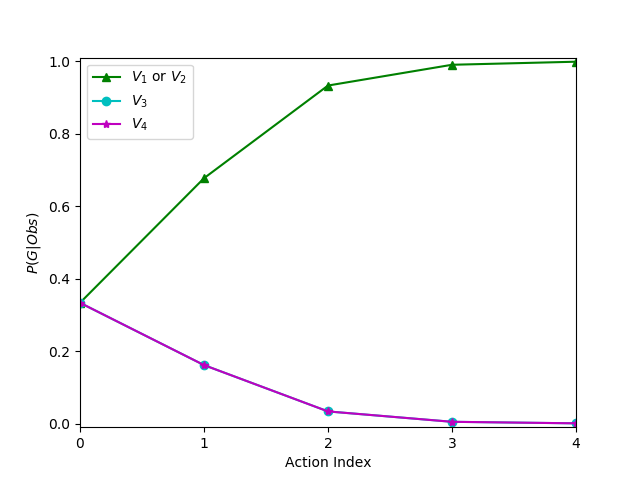

['I', '(MOVE P6_1 P5_1)', '(MOVE P5_1 P4_1)', '(MOVE P4_1 P3_1)', '(MOVE P3_1 P2_1)', '(MOVE P2_1 P2_2)', '(MOVE P2_2 P2_3)', '(MOVE P2_3 P2_4)', '(MOVE P2_4 P2_5)', '(MOVE P2_5 P2_6)', '(MOVE P2_6 P2_7)', '(MOVE P2_7 P2_8)', '(MOVE P2_8 P2_9)', '(MOVE P2_9 P2_10)']
13


<IPython.core.display.Javascript object>


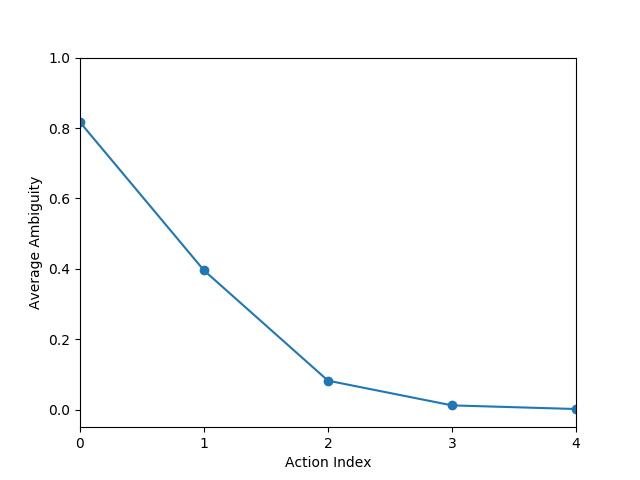

[0.816496580927726, 0.395428, 0.0822002, 0.0119947, 0.00164067, 0.00164067, 0.00164067, 0.00164067, 0.00164067, 0.00164067, 0.00101803, 0.000956667, 0.000949053, 0.000948037]


In [7]:

plt.figure(2)

axes = plt.gca()
axes.set_ylim([-0.01,1.01])
axes.set_xlim([0,4])
axes.set_xlabel('Action Index')
axes.set_ylabel('$P(G | Obs)$')
axes.xaxis.set_major_locator(MaxNLocator(integer=True))
counter = 0
print(actions)
print(len(actions) -1)

for j in prob_dists:
    #print(i)
    #print(len(i))
    i = j[0:5]
    if counter == 0 :
        label1 = "$V_1$ or $V_2$"
    else :
        label1 = "$V_" + str(counter+2) + "$"
    if counter + 2 == 3:
        plt.plot(range(0, len(i)), i, linestyle='-', label=label1, color='c', marker="o")
    elif counter +2 == 4:
        plt.plot(range(0, len(i)), i, label=label1, color='m', marker='*')
    else :
        plt.plot(range(0, len(i)), i, label=label1, color='g', marker='^')
    counter += 1
    
#plt.xticks(range(0, len(actions)-1), actions)
plt.legend(loc='upper left')

plt.figure(3)
axes = plt.gca()
distances = [math.sqrt(2/3)] + distances
#distances = [distances[0]] + distances
print(distances)
axes.set_xlabel('Action Index')
axes.set_ylabel('Average Ambiguity')
axes.set_ylim([-0.05,1])
axes.set_xlim([0,4])
axes.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(range(0, len(actions)), distances, marker="o")

# plt.figure(1)
# ax = plt.axes(projection='3d')

# ax.set_ylim([0,1])
# ax.set_xlim([0,1])
# ax.set_zlim([0,1])

# ax.set_xlabel('P(G2 | O)')
# ax.set_ylabel('P(G1 | O)')
# ax.set_zlabel('P(G* | O)')

# G_star = 0
# G1 = 1
# G2 = 2


# print(prob_dists)

# r = range(len(prob_dists[0]))

# p0 = [-prob_dists[G_star][x0] + prob_dists[G_star][x1] for x0 in list(r) for x1 in list(r) if x0 + 1  == x1]
# p1 = [-prob_dists[G1][x0] + prob_dists[G1][x1] for x0 in list(r) for x1 in list(r) if x0 + 1  == x1]
# p2 = [-prob_dists[G2][x0] + prob_dists[G2][x1] for x0 in list(r) for x1 in list(r) if x0 + 1  == x1]

# ax.plot(prob_dists[G1], prob_dists[G2], prob_dists[G_star], '-b')
# ax.quiver(prob_dists[G1][:-1], prob_dists[G2][:-1],prob_dists[G_star][:-1],  p1, p2,p0, length=0.1, pivot='tail')





plt.show()
